In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn



from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

C:\Home\Apps\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
import copy as cp

In [7]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

# Logistic Regression of Churn Prediction model

In [8]:
dataSource = pd.read_csv("Telco Churn-1.csv")

In [9]:
dataSource.head(3).T

,0,1,2
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK
gender,Female,Male,Male
SeniorCitizen,0,0,0
Partner,Yes,No,No
Dependents,No,No,No
tenure,1,34,2
PhoneService,No,Yes,Yes
MultipleLines,No phone service,No,No
InternetService,DSL,DSL,DSL
OnlineSecurity,No,Yes,Yes


# Variable Description

- customerID 
  - unique customer identification number
 
 
- gender
  - Male or Femalae
 
 
- SeniorCitizen
  - If a Customer is a Senior Citizen or not, generally it is defined if age is more than 58


- Partner
  - Tells if a custer is single or married


- Dependents
  - If a custer is a parent or not.
  
  
- tenure
  - for how many months the given person was a customer
  
 
- PhoneService
  - Does the customer has a voice product subscribed
  
  
- MultipleLines
  - Does the customer has more than one line sunscribed
  
  
- InternetService
  - Does the user has internet services also subscribed. what type is it?
  
  
- OnlineSecurity
  - If the customer has internet facility, has he subscribed for online security
  
 
- OnlineBackup
  - If the customer has internet facility, has he subscribed for Online backup


- DeviceProtection
  - If a customer has opted for devicem does he/she also subscribed for Device protection


- TechSupport
  - Does the Customer subscribed for technical support feature
  
  
- StreamingTV
  - If the customer subscribed for Internet, did the customer also subscribe for Streaming TV
  
  
- StreamingMovies
  - If the customer subscribed for Internet, did the customer also subscribe for Streaming Movies
  

- Contract
  - What type of Contract does the customer Subscribe for
  
  
- PaperlessBilling
  - Has the customer Subscribe for paperless billing?
  

- PaymentMethod
  - What is the preferred method payment opted by the customer?
  
  
- MonthlyCharges
  - What is the average monthly charges for this Customer?


- TotalCharges
  - Till date what is the amount payed by customer?
  
  
- Churn
  - Has this customer churned or not? [**Target Variable**]

when we look at the variables, many of those are string categorical variables and we have to convert those to numeric categorical using dummy coding

In [10]:
workingData = cp.deepcopy(dataSource)

### Checking if the Target Variable is Binary
Since we are building a model to predict Customer Churn from Telecom Data, our target is going to be "Churn" variable from the workingData dataframe. To make sure that it's a binary variable, let's use Seaborn's countplot() function.

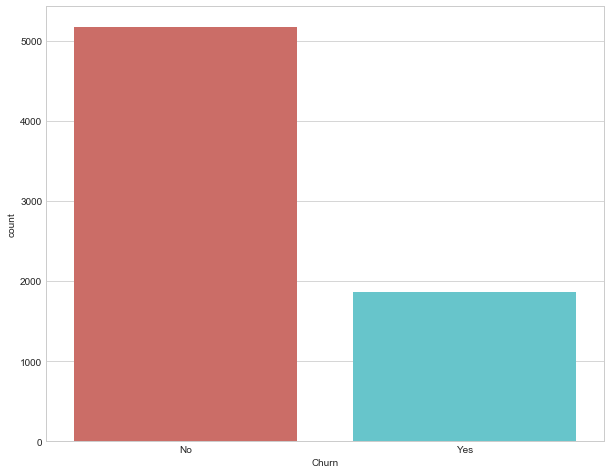

In [11]:
sb.countplot('Churn', data=workingData, palette='hls')

Ok, so we see that the Churn variable is binary (No - did not Churn / Yes - Churned)

### Checking for missing values
It's easy to check for missing values by calling the isnull() method, and the sum() method off of that, to return a tally of all the True values that are returned by the isnull() method.

In [12]:
workingData.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Ok, We see no null values in any of the variables provided in the dataset. This will mean little work to do for missing value computation and sampling technique.

In [13]:
workingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

### Feature Selection for Logistic Regression

- **customerID** 
  - unique customer identification number, this value is absolutely irrelevant predicting churn. So, let’s not have this for model building
 
 
- **gender**
  - Does gender play a critical role in for Churn? yes, it does equally as buying decision.  This is very important variable for predicting the Churn.
  
 
- **SeniorCitizen**
  - The behavior, impulse, reaction and factors that are considered for churn. Some of the Senior Citizen might not earn as much as non-Senior Citizens would, so that might make them to Quit. So, Lets have this variable for our prediction.


- **Partner**
  - Tells if a Customer is single or married, this might not have a direct impact, probably it would. Lets have this and based on the significance we can decide on it later.


- **Dependents**
  - If a Customer is a parent or not.this might not have a direct impact, probably it would. Lets have this and based on the significance we can decide on it later.
  
  
- **tenure**
  - for how many months the given person was a customer. This will have a significant impact on Churn Decision. Lets have it.
  
 
- **PhoneService**
- **MultipleLines**
- **InternetService**
   - All the above 3 are primary products offered by the Telecom company. Customers will expect a good quality of service on all three, anything less than excellent will make customer to Churn. These are very important variables for Churn Prediction.  
  

- **TechSupport**
- **DeviceProtection**
   - Technical support and Device Protection are Add-on feature that is provided to customers. But, customers don't perceive this as add-on, they expect same level of services as their core products. Anything less will increase the probability of a customer churning out.

- **OnlineSecurity**
- **OnlineBackup**
- **StreamingTV**
- **StreamingMovies**
  - These are again, add-on products that customer subscribe to in addition to Core products. There are equal chances for a customer to churn or not to churn based on this variable.  Let us continue to keep this in our model.


- **Contract**
- **PaperlessBilling**
- **PaymentMethod**
- **MonthlyCharges**
  - These are the variables which Customer measure the loyalty of the telecom company. Customers have 0 tolerance on this variable and they are very likely to churn if anything goes even insignificantly here. These are very important variables for Churn prediction model


- **TotalCharges**
  - This is just a aggregate of product of Monthly changes and tenure. This might lead to collinearity if we have this. So, we can take this out from our model.
  
  
- **Churn**
  - Has this customer churned or not? [**Target Variable**]

## Dummy Coding

In [14]:
dummyWorkingFile = cp.deepcopy(dataSource)

In [16]:
gender_dummy = pd.get_dummies(dummyWorkingFile['gender'], drop_first=True)

partner_dummy = pd.get_dummies(dummyWorkingFile['Partner'], drop_first=True)

partner_dummy.columns = ['Partner']

dependents_dummy = pd.get_dummies(dummyWorkingFile['Dependents'], drop_first=True)

dependents_dummy.columns = ['Dependents']

phoneservice_dummy = pd.get_dummies(dummyWorkingFile['PhoneService'], drop_first=True)

phoneservice_dummy.columns= ['PhoneService']

multiplelines_dummy = pd.get_dummies(dummyWorkingFile['MultipleLines'], drop_first=True)

multiplelines_dummy.columns = ['MultiLines_No_Phone_Service', 'MultipleLines']

internetservice_dummy = pd.get_dummies(dummyWorkingFile['InternetService'])

internetservice_dummy.columns = ['DSL','FiberOptic','NoInternetService']

onlinesecurity_dummy = pd.get_dummies(dummyWorkingFile['OnlineSecurity'], drop_first=True)

onlinesecurity_dummy.columns = ['NoInternetService','OnlineSecurity']

OnlineBackup_dummy = pd.get_dummies(dummyWorkingFile.OnlineBackup, drop_first=True)

OnlineBackup_dummy.columns = ['NoInternetService','OnlineBackup']

DeviceProtection_dummy = pd.get_dummies(dummyWorkingFile.DeviceProtection, drop_first=True)

DeviceProtection_dummy.columns  = ['NoInternetService','DeviceProtection']

TechSupport_dummy = pd.get_dummies(dummyWorkingFile.TechSupport, drop_first=True)

TechSupport_dummy.columns  = ['NoInternetService','TechSupport']

StreamingTV_dummy = pd.get_dummies(dummyWorkingFile.StreamingTV, drop_first=True)

StreamingTV_dummy.columns  = ['NoInternetService','StreamingTV']

StreamingMovies_dummy = pd.get_dummies(dummyWorkingFile.StreamingMovies, drop_first=True)

StreamingMovies_dummy.columns= ['NoInternetService','StreamingMovies']

Contract_dummy = pd.get_dummies(dummyWorkingFile.Contract)

Contract_dummy.columns = ['c_Month-to-month','c_One year','c_Two year']

PaperlessBilling_dummy = pd.get_dummies(dummyWorkingFile.PaperlessBilling, drop_first=True)

PaperlessBilling_dummy.columns = ['PaperlessBilling']

PaymentMethod_dummy = pd.get_dummies(dummyWorkingFile.PaymentMethod)

PaymentMethod_dummy.columns = ['PM_Bank transfer (automatic)','PM_Credit card (automatic)','PM_Electronic check','PM_Mailed check']

Churn_dummy = pd.get_dummies(dummyWorkingFile.Churn, drop_first=True)

Churn_dummy.columns = ['Churn']

In [17]:
dummyWorkingFile = cp.deepcopy(dummyWorkingFile.loc[:,['SeniorCitizen','tenure','MonthlyCharges']])

In [18]:
dummyWorkingFile.head(4).T

,0,1,2,3
SeniorCitizen,0.00,0.00,0.00,0.0
tenure,1.00,34.00,2.00,45.0
MonthlyCharges,29.85,56.95,53.85,42.3


In [19]:
FinalWorkingFile = cp.deepcopy(dummyWorkingFile)

FinalWorkingFile['Male'] = gender_dummy

FinalWorkingFile['Partner'] = partner_dummy

FinalWorkingFile['Dependents'] = dependents_dummy

FinalWorkingFile['PhoneService'] = phoneservice_dummy

FinalWorkingFile['MultiLines_No_Phone_Service'] = multiplelines_dummy['MultiLines_No_Phone_Service']

FinalWorkingFile['MultipleLines'] = multiplelines_dummy['MultipleLines']

FinalWorkingFile['DSL'] = internetservice_dummy['DSL']
FinalWorkingFile['FiberOptic'] = internetservice_dummy['FiberOptic']
FinalWorkingFile['NoInternetService'] = internetservice_dummy['NoInternetService']

FinalWorkingFile['OnlineSecurity'] = onlinesecurity_dummy['OnlineSecurity']

FinalWorkingFile['OnlineBackup'] = OnlineBackup_dummy['OnlineBackup']

FinalWorkingFile['DeviceProtection'] = DeviceProtection_dummy['DeviceProtection']

FinalWorkingFile['TechSupport'] = TechSupport_dummy['TechSupport']

FinalWorkingFile['StreamingTV'] = StreamingTV_dummy['StreamingTV']

FinalWorkingFile['StreamingMovies'] = StreamingMovies_dummy['StreamingMovies']

FinalWorkingFile['c_Month-to-month'] = Contract_dummy['c_Month-to-month']
FinalWorkingFile['c_One year'] = Contract_dummy['c_One year']
FinalWorkingFile['c_Two year'] = Contract_dummy['c_Two year'] 

FinalWorkingFile['PaperlessBilling'] = PaperlessBilling_dummy['PaperlessBilling']

FinalWorkingFile['PM_Bank transfer (automatic)'] = PaymentMethod_dummy['PM_Bank transfer (automatic)']
FinalWorkingFile['PM_Credit card (automatic)']= PaymentMethod_dummy['PM_Credit card (automatic)']
FinalWorkingFile['PM_Electronic check'] = PaymentMethod_dummy['PM_Electronic check']
FinalWorkingFile['PM_Mailed check'] = PaymentMethod_dummy['PM_Mailed check']

FinalWorkingFile['Churn'] = Churn_dummy['Churn']

#### After converting all categorical variables to Dummy Variables using Dummy coding

In [20]:
FinalWorkingFile.head(10).T

,0,1,2,3,4,5,6,7,8,9
SeniorCitizen,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00
tenure,1.00,34.00,2.00,45.0,2.0,8.00,22.0,10.00,28.0,62.00
MonthlyCharges,29.85,56.95,53.85,42.3,70.7,99.65,89.1,29.75,104.8,56.15
Male,0.00,1.00,1.00,1.0,0.0,0.00,1.0,0.00,0.0,1.00
Partner,1.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,1.0,0.00
Dependents,0.00,0.00,0.00,0.0,0.0,0.00,1.0,0.00,0.0,1.00
PhoneService,0.00,1.00,1.00,0.0,1.0,1.00,1.0,0.00,1.0,1.00
MultiLines_No_Phone_Service,1.00,0.00,0.00,1.0,0.0,0.00,0.0,1.00,0.0,0.00
MultipleLines,0.00,0.00,0.00,0.0,0.0,1.00,1.0,0.00,1.0,0.00
DSL,1.00,1.00,1.00,1.0,0.0,0.00,0.0,1.00,0.0,1.00


## Finding the correlations

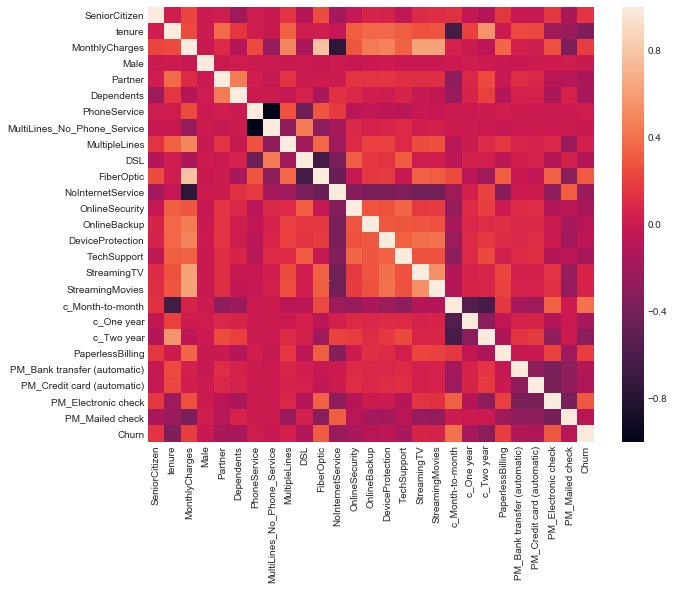

In [21]:
sb.heatmap(FinalWorkingFile.corr())

**MultiLines_No_Phone_Service & NoInternetService are highly correlated with PhoneService and Monthly Charges Respectively. So, We will drop MultiLines_No_Phone_Service & NoInternetService.**

In [22]:
FinalWorkingFile.drop(['MultiLines_No_Phone_Service','NoInternetService'], axis=1, inplace=True)

### Checking that your dataset size is sufficient

We have 24 predictive features that remain. The rule of thumb is 100 records per feature... so we need to have at least 2400 records in this dataset. Let's check again

In [23]:
FinalWorkingFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
SeniorCitizen                   7043 non-null int64
tenure                          7043 non-null int64
MonthlyCharges                  7043 non-null float64
Male                            7043 non-null uint8
Partner                         7043 non-null uint8
Dependents                      7043 non-null uint8
PhoneService                    7043 non-null uint8
MultipleLines                   7043 non-null uint8
DSL                             7043 non-null uint8
FiberOptic                      7043 non-null uint8
OnlineSecurity                  7043 non-null uint8
OnlineBackup                    7043 non-null uint8
DeviceProtection                7043 non-null uint8
TechSupport                     7043 non-null uint8
StreamingTV                     7043 non-null uint8
StreamingMovies                 7043 non-null uint8
c_Month-to-month                7043 non-null uint8
c_One y

Ok, we have 7043 records, it is fine

#### Splitting X and Y and Creating Train and Test Data

In [108]:
X = FinalWorkingFile.loc[:,['SeniorCitizen','tenure','MonthlyCharges','Male','Partner','Dependents','PhoneService','MultipleLines','DSL','FiberOptic','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','c_Month-to-month','c_One year','c_Two year', 'PaperlessBilling','PM_Bank transfer (automatic)','PM_Credit card (automatic)','PM_Electronic check','PM_Mailed check']].values

In [82]:
Y = FinalWorkingFile['Churn'].values

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .3, random_state=25)

### Deployning and Evaluating the Model

In [84]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
y_pred = LogReg.predict(X_test)

In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1392,  150],
       [ 264,  307]], dtype=int64)

In [88]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87      1542
          1       0.67      0.54      0.60       571

avg / total       0.79      0.80      0.80      2113



In [89]:
TP = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
TN = confusion_matrix[1][1]

In [90]:
TPR_True_Positive_Rate = TP/(TP+FN)

In [91]:
TPR_True_Positive_Rate

0.84057971014492749

In [92]:
FPR_False_positive_rate = FP/(FP+TN)

In [93]:
FPR_False_positive_rate

0.32822757111597373

In [94]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)

In [95]:
Accuracy

0.80407004259346904

## ROC Curve

In [96]:
preds = LogReg.predict_proba(X_test)[:,1]

In [97]:
fpr,tpr, _ = metrics.roc_curve(y_test, preds)

In [98]:
rocDf = pd.DataFrame(dict(fpr=fpr,tpr=tpr))

In [99]:
_auc = metrics.auc(fpr,tpr)

In [100]:
_auc

0.85228090977441895

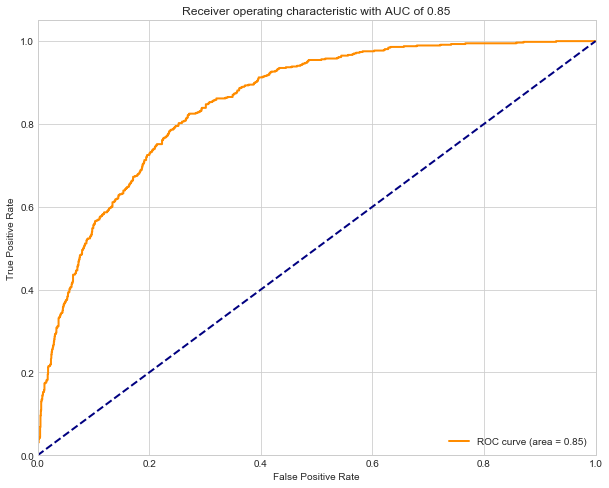

In [101]:
plt.figure()
plt.plot(fpr,tpr,color='darkorange', lw=2,label='ROC curve (area = %0.2f)' % _auc)
plt.plot([0,1],[0,1],color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with AUC of %0.2f' % _auc)
plt.legend(loc="lower right")
plt.show()

## Conclusion

#### ** The Model Prediction accuracy is 80.4% with very optimistic AUC of .85